# **Title of Project**

Hand Written Digit Prediction

## **Objective**

The Objective is to predict the correct number when the model is given a dataset that is an image of hand written numbers.

## **Data Source**

the following is the Data source used in the Project: (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

## **Import Library**

In [78]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [79]:
from sklearn.datasets import load_digits
df =load_digits()

## **Data Visualization**

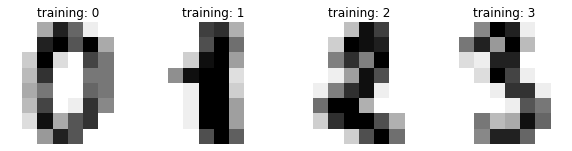

In [80]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("training: %i" %label)

## **Describe Data**

In [81]:
df.images.shape


(1797, 8, 8)

In [82]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [83]:
df.images[0].shape

(8, 8)

In [84]:
len(df.images)


1797

In [85]:
n_samples = len(df.images)
data=df.images.reshape((n_samples,-1))

In [86]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [87]:
data[0].shape

(64,)

In [88]:
data.shape

(1797, 64)

## **Data Preprocessing**

In [89]:
data.min()

0.0

In [90]:
data.max()

16.0

In [91]:
data=data/16

In [92]:
data.min()

0.0

In [93]:
data.max()

1.0

In [94]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In [95]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)


## **Train Test Split**

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()


## **Prediction**

In [98]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([1, 9, 3, 7, 5, 7, 4, 9, 4, 4, 1, 1, 2, 1, 6, 1, 4, 8, 4, 8, 7, 7,
       7, 4, 8, 2, 6, 7, 9, 2, 3, 9, 6, 2, 8, 2, 6, 6, 4, 6, 7, 4, 8, 6,
       4, 5, 9, 7, 4, 9, 6, 4, 5, 0, 3, 2, 4, 2, 0, 7, 0, 2, 7, 8, 4, 6,
       9, 3, 1, 1, 7, 4, 6, 6, 9, 2, 0, 7, 7, 5, 9, 4, 7, 0, 8, 6, 8, 6,
       9, 9, 2, 5, 5, 2, 0, 6, 8, 1, 8, 5, 8, 1, 9, 2, 6, 7, 5, 0, 5, 4,
       6, 8, 2, 6, 7, 6, 4, 2, 2, 7, 0, 1, 6, 9, 5, 7, 4, 7, 7, 4, 9, 5,
       7, 5, 4, 5, 5, 6, 0, 1, 2, 4, 1, 2, 1, 3, 1, 6, 5, 8, 2, 8, 1, 6,
       4, 1, 6, 8, 6, 9, 6, 0, 6, 0, 1, 2, 5, 5, 2, 5, 6, 3, 6, 6, 2, 4,
       5, 3, 1, 3, 2, 2, 5, 3, 6, 9, 2, 8, 2, 1, 4, 9, 0, 0, 7, 6, 6, 8,
       6, 3, 1, 4, 7, 4, 5, 5, 3, 4, 6, 9, 6, 6, 2, 5, 3, 7, 4, 6, 6, 3,
       4, 7, 2, 7, 8, 8, 1, 7, 8, 0, 4, 6, 6, 2, 7, 1, 7, 9, 9, 6, 0, 4,
       7, 3, 0, 2, 9, 1, 3, 2, 7, 9, 7, 9, 8, 0, 3, 3, 1, 5, 1, 2, 2, 1,
       8, 5, 8, 4, 1, 4, 3, 3, 4, 8, 1, 1, 1, 7, 3, 6, 2, 8, 5, 7, 6, 0,
       8, 4, 9, 2, 5, 1, 7, 4, 1, 1, 0, 7, 5, 0, 3,

## **Model Evaluation**

In [99]:

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)


array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 50,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 1,  2,  0,  0,  1,  0,  0,  0, 47,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 48]], dtype=int64)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.97      1.00      0.98        57
           2       1.00      1.00      1.00        62
           3       0.98      0.96      0.97        53
           4       0.98      0.97      0.97        59
           5       0.96      0.98      0.97        51
           6       1.00      0.98      0.99        57
           7       0.97      0.98      0.97        57
           8       1.00      0.90      0.95        52
           9       0.91      0.94      0.92        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

